In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data Frame
accel_data = pd.read_csv('/content/all_accelerometer_data_pids_13.csv')

In [3]:
accel_data.head(10)

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163
5,1493733883945,SA0297,-0.2888,0.0514,-0.0145
6,1493733883953,SA0297,-0.0413,-0.0184,-0.0105
7,1493733883957,SA0297,-0.0413,-0.0001,0.0017
8,1493733883963,SA0297,-0.0286,-0.0028,-0.0094
9,1493733883974,SA0297,-0.0543,-0.0410,-0.0109


In [4]:
# Check unique participants
accel_data.pid.unique()

array(['JB3156', 'CC6740', 'SA0297', 'PC6771', 'BK7610', 'DC6359',
       'MC7070', 'MJ8002', 'BU4707', 'JR8022', 'HV0618', 'SF3079',
       'DK3500'], dtype=object)

In [5]:
accel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057567 entries, 0 to 14057566
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   pid     object 
 2   x       float64
 3   y       float64
 4   z       float64
dtypes: float64(3), int64(1), object(1)
memory usage: 536.3+ MB


In [6]:
accel_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time,14057567.0,1.493778e+12,5.640453e+08,0.000000e+00,1.493755e+12,1.493779e+12,1.493801e+12,1.493829e+12
x,14057567.0,-9.269848e-03,9.540696e-01,-4.333507e+01,-5.700000e-03,-2.000000e-04,7.600000e-03,3.922540e+01
y,14057567.0,-7.168398e+06,3.528998e+07,-1.809008e+08,-4.500000e-03,-2.000000e-04,4.500000e-03,2.731123e+01
z,14057567.0,7.168398e+06,3.528998e+07,-4.902300e+01,-4.200000e-03,6.100000e-03,4.605889e-02,1.809008e+08


In [7]:
# ensure our values are sorted by time
SA0297_data = accel_data[accel_data['pid'] == 'SA0297'].sort_values('time')

In [8]:
SA0297_data.head(10)

,time,pid,x,y,z
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163
5,1493733883945,SA0297,-0.2888,0.0514,-0.0145
6,1493733883953,SA0297,-0.0413,-0.0184,-0.0105
7,1493733883957,SA0297,-0.0413,-0.0001,0.0017
8,1493733883963,SA0297,-0.0286,-0.0028,-0.0094
9,1493733883974,SA0297,-0.0543,-0.0410,-0.0109
10,1493733883977,SA0297,0.0070,-0.0050,-0.0849
11,1493733883991,SA0297,-0.0561,-0.0226,0.0134


In [9]:
SA0297_data.count()

time    962901
pid     962901
x       962901
y       962901
z       962901
dtype: int64

In [10]:
# are our timestamps evenly spaced?
SA0297_data['time_diff'] = SA0297_data['time'].diff(1)
SA0297_data.head(10)  

,time,pid,x,y,z,time_diff
2,1493733882409,SA0297,0.0758,0.0273,-0.0102,NaN
3,1493733882455,SA0297,-0.0359,0.0794,0.0037,46.0
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,45.0
5,1493733883945,SA0297,-0.2888,0.0514,-0.0145,1445.0
6,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,8.0
7,1493733883957,SA0297,-0.0413,-0.0001,0.0017,4.0
8,1493733883963,SA0297,-0.0286,-0.0028,-0.0094,6.0
9,1493733883974,SA0297,-0.0543,-0.0410,-0.0109,11.0
10,1493733883977,SA0297,0.0070,-0.0050,-0.0849,3.0
11,1493733883991,SA0297,-0.0561,-0.0226,0.0134,14.0


In [11]:
SA0297_TAC = pd.read_csv('/content/SA0297_clean_TAC.csv')

In [12]:
SA0297_TAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    58 non-null     int64  
 1   TAC_Reading  58 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [13]:
SA0297_TAC.head(10)

,timestamp,TAC_Reading
0,1493716723,-0.010229
1,1493718546,-0.002512
2,1493718863,0.003249
3,1493719179,0.005404
4,1493719495,0.003377
5,1493719811,-0.001451
6,1493720127,-0.005816
7,1493720443,-0.006248
8,1493720759,-0.001631
9,1493721075,0.005332


In [14]:
# we have negative TAC values? upon inspection of raw TAC values, this is due to the filtering done on the data.
# Are our timestamps evenly spaced?
SA0297_TAC['time_diff'] = SA0297_TAC['timestamp'].diff(1)
SA0297_TAC.head(10)

,timestamp,TAC_Reading,time_diff
0,1493716723,-0.010229,NaN
1,1493718546,-0.002512,1823.0
2,1493718863,0.003249,317.0
3,1493719179,0.005404,316.0
4,1493719495,0.003377,316.0
5,1493719811,-0.001451,316.0
6,1493720127,-0.005816,316.0
7,1493720443,-0.006248,316.0
8,1493720759,-0.001631,316.0
9,1493721075,0.005332,316.0


In [15]:
# bin accelerometer data according to TAC timestamps
cuts = list(SA0297_TAC['timestamp'] * 1000 ) # seconds to milleseconds
cuts.insert(0, 0)
labels = SA0297_TAC['TAC_Reading']

bin_labels = range(len(cuts) - 1)

SA0297_data['TAC_Reading'] = pd.cut(SA0297_data['time'], bins=cuts, labels=labels)
# since TAC_Reading isn't unique, generate a bin column for the times
# SA0297_data['bins'] = pd.cut(SA0297_data['time'], bins=cuts, labels=bin_labels)

In [16]:
SA0297_data.head(1000)

,time,pid,x,y,z,time_diff,TAC_Reading
2,1493733882409,SA0297,0.0758,0.0273,-0.0102,NaN,0.032672
3,1493733882455,SA0297,-0.0359,0.0794,0.0037,46.0,0.032672
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,45.0,0.032672
5,1493733883945,SA0297,-0.2888,0.0514,-0.0145,1445.0,0.032672
6,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,8.0,0.032672
...,...,...,...,...,...,...,...
997,1493733927505,SA0297,0.0002,-0.0009,0.0001,45.0,0.032672
998,1493733927550,SA0297,-0.0005,-0.0012,0.0007,45.0,0.032672
999,1493733927685,SA0297,-0.0002,0.0007,-0.0009,135.0,0.032672
1000,1493733927729,SA0297,-0.0005,0.0018,0.0005,44.0,0.032672


In [ ]:
SA0297_data['TAC_Reading'].unique()

[0.032672, 0.023972, 0.160592, 0.182644]
Categories (4, float64): [0.032672 < 0.023972 < 0.160592 < 0.182644]

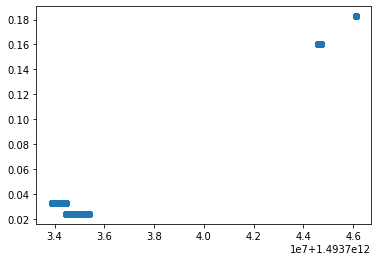

In [ ]:
plt.scatter(SA0297_data['time'], SA0297_data['TAC_Reading'])

In [ ]:
# sum distance moved in each direction by each TAC Reading time interval
# A = pd.ToDataFrame()
dim = ['x', 'y', 'z']
for col in dim:
  SA0297_data[col] = SA0297_data[col].abs()

means = SA0297_data[dim + ['TAC_Reading']].groupby('TAC_Reading').mean()

In [ ]:
# extract only values where we have data for
means = means.dropna().reset_index()
means.columns = ['TAC_Reading', 'mean_x', 'mean_y', 'mean_z']

In [ ]:
means.head()

,TAC_Reading,mean_x,mean_y,mean_z
0,0.032672,0.109312,0.098836,0.116940
1,0.023972,0.130532,0.119688,0.138402
2,0.160592,0.030220,0.129388,0.395968
3,0.182644,0.139431,0.135425,0.128544


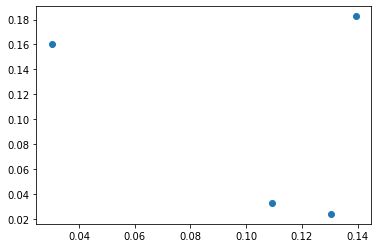

In [ ]:

plt.scatter(means['mean_x'], means['TAC_Reading'])

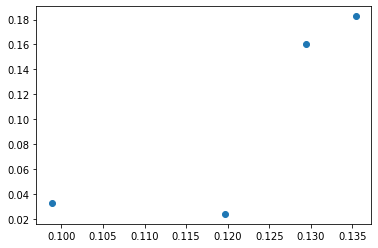

In [ ]:
plt.scatter(means['mean_y'], means['TAC_Reading'])

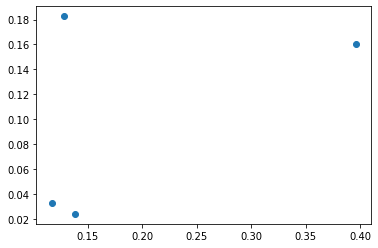

In [ ]:
plt.scatter(means['mean_z'], means['TAC_Reading'])

In [ ]:
means['pid'] = 'SA0297'

In [ ]:
means.head()

,TAC_Reading,mean_x,mean_y,mean_z,pid
0,0.032672,0.109312,0.098836,0.116940,SA0297
1,0.023972,0.130532,0.119688,0.138402,SA0297
2,0.160592,0.030220,0.129388,0.395968,SA0297
3,0.182644,0.139431,0.135425,0.128544,SA0297


In [17]:
# now apply this to all participants in the dataset
pids = accel_data.pid.unique()
starting_dfs = {}
non_agg_dfs = {}
final_dfs = {}
dims = ['x', 'y', 'z']


def calculate_abs_means(df, cols, group_by_col):
    for col in cols:
        df[col] = df[col].abs()
    
    means = df[cols + [group_by_col]].groupby(group_by_col).mean()
    means = means.dropna().reset_index()
    means.columns = ['TAC_Reading', 'mean_x', 'mean_y', 'mean_z']
    
    return means

def calculate_vars(df, cols, group_by_col):
    vars = df[cols + [group_by_col]].groupby(group_by_col).var()
    vars = vars.dropna().reset_index()
    vars.columns = ['TAC_Reading', 'var_x', 'var_y', 'var_z']

    return vars

In [35]:
starting_dfs = accel_data.groupby(accel_data.pid)

for p in pids:
    accel_data_p = starting_dfs.get_group(p).sort_values('time')
    tac_data_p = pd.read_csv('/content/' + p + '_clean_TAC.csv')

    cuts = list(tac_data_p['timestamp'] * 1000 ) # seconds to milleseconds
    cuts.insert(0, 0)
    labels = tac_data_p['TAC_Reading']

    accel_data_p['TAC_Reading'] = pd.cut(accel_data_p['time'], bins=cuts, labels=labels)
    accel_data_p = accel_data_p.dropna(subset=['TAC_Reading'])
    non_agg_dfs['p'] = accel_data_p

    # group by 10 second intervals = 10000 ms
    accel_data_p['TAC_Reading'] = accel_data_p['TAC_Reading'].round(5)
    groups = accel_data_p.groupby('TAC_Reading')
    MULT = 10000
    temp_concat = []

    for k in groups.groups.keys():
        single_group = groups.get_group(k)
        count = len(single_group)
        print(count)

        # take also a final group of size MULT by taking nrows - MULT to end of df
        remain = count % MULT
        row_ranges = list(range(0, count, MULT))
        row_ranges.append(count - remain)
        for i in range(len(row_ranges) - 1 ):
            subset = single_group.reset_index().iloc[row_ranges[i]:row_ranges[i + 1],]
            means_p = calculate_abs_means(single_group, dims, 'TAC_Reading')
            vars_p = calculate_vars(single_group, dims, 'TAC_Reading')

            merged_p = means_p.merge(vars_p, on='TAC_Reading')
            temp_concat.append(merged_p)
    
    concat_p = pd.concat(temp_concat)     

    concat_p['pid'] = p

    final_dfs[p] = concat_p


23179
25724
55164


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


68781
42412
45567
45806
38422
62864
35064
71144
31487
49913
45727
43873
43622
32493
72117
40054
40571
55641
47479
51967
62839
45838
72176
71885
70967
79083
73192
72509
71604
82361
72635
71574
71569
78679
9955
69559
18326
68600
46098
73155
45753
20054
7756
43582
73271
18501
7137
11157
39364
26872
14019
21527
32665
10844
18386
28289
17990
29835
23985
20972
40143
40210
40150
40187
40148
40083
40135
40165
28580
17204
3949
40164
10844
8074
18290
40655
40563
19958
5250
25314
25485
3992
303
269
34199
11711
72535
72533
72534
72532
72526
72530
72531
72535
71532
72527
30359
72525
72543
69464
59378
52178
14740
49950
45948
76810
71519
62738
13476
29137
73809
73211
73773
42535
40781
72728
70856
81383
79709
75676
80836
73011
23324
73687
73608
71612
73574
71614
15412
560
70179
69173
70215
69020
67192
37723
34963
69209
23778
17950
45984
21976
17103
2329
58486
10988
73440
48402
73580
135
12161
12979
45258
73596
23983
72005
63976
73046
73655
73655
5215
54001
15865
2995
41074
73799
49218
73756
73710
2571

In [36]:
# generate combined df
combined_df = pd.concat(final_dfs.values()) 

In [37]:
combined_df.head()

,TAC_Reading,mean_x,mean_y,mean_z,var_x,var_y,var_z,pid
0,0.02792,0.135799,0.072888,0.270933,0.062644,0.012252,0.115202,JB3156
0,0.02792,0.135799,0.072888,0.270933,0.062644,0.012252,0.115202,JB3156
0,0.02792,0.135799,0.072888,0.270933,0.062644,0.012252,0.115202,JB3156
0,0.03555,1.821660,2.576077,3.471074,7.421240,11.401192,30.671136,JB3156
0,0.03555,1.821660,2.576077,3.471074,7.421240,11.401192,30.671136,JB3156


In [38]:
combined_df.count()

TAC_Reading    1277
mean_x         1277
mean_y         1277
mean_z         1277
var_x          1277
var_y          1277
var_z          1277
pid            1277
dtype: int64

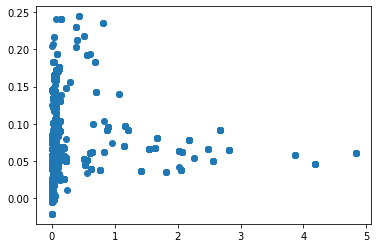

In [39]:
plt.scatter(combined_df['mean_x'], combined_df['TAC_Reading'])

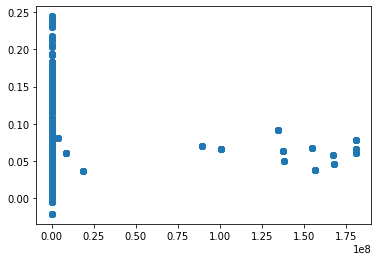

In [40]:
plt.scatter(combined_df['mean_y'], combined_df['TAC_Reading'])

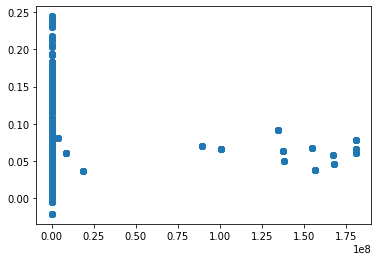

In [41]:
plt.scatter(combined_df['mean_z'], combined_df['TAC_Reading'])

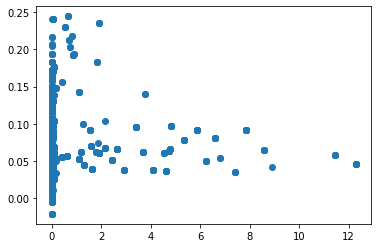

In [42]:
plt.scatter(combined_df['var_x'], combined_df['TAC_Reading'])

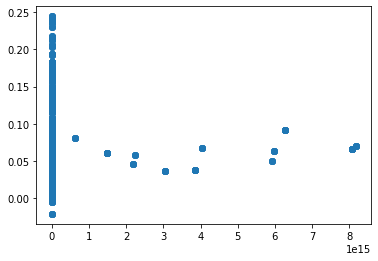

In [43]:
plt.scatter(combined_df['var_y'], combined_df['TAC_Reading'])

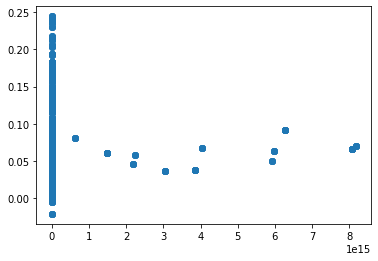

In [44]:
plt.scatter(combined_df['var_z'], combined_df['TAC_Reading'])

In [118]:
# relabel our index 

combined_df.loc[combined_df['TAC_Reading'] >= 0.08, 'Over Legal Limit'] = 'Yes'
combined_df.loc[combined_df['TAC_Reading'] < 0.08, 'Over Legal Limit'] = 'No'

In [119]:
# drop TAC Reading as it is basically a label and cannot be used in features
labeled_df = combined_df.drop('TAC_Reading', axis=1)
labeled_df.head()

,mean_x,mean_y,mean_z,var_x,var_y,var_z,pid,Over Legal Limit
0,0.135799,0.072888,0.270933,0.062644,0.012252,0.115202,JB3156,No
0,0.135799,0.072888,0.270933,0.062644,0.012252,0.115202,JB3156,No
0,0.135799,0.072888,0.270933,0.062644,0.012252,0.115202,JB3156,No
0,1.821660,2.576077,3.471074,7.421240,11.401192,30.671136,JB3156,No
0,1.821660,2.576077,3.471074,7.421240,11.401192,30.671136,JB3156,No


In [120]:
from sklearn.model_selection import train_test_split

X = labeled_df.drop('Over Legal Limit', axis = 1)
y = labeled_df['Over Legal Limit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
encoder = OneHotEncoder()
scaler = StandardScaler()

print(X_train)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Scale and encode columns
scaled_columns  = scaler.fit_transform(X_train[numerical_cols]) 
encoded_columns =  encoder.fit_transform(X_train[categorical_cols]).toarray()

X_train = np.concatenate([scaled_columns, encoded_columns], axis=1)

test_scaled_columns  = scaler.transform(X_test[numerical_cols]) 
test_encoded_columns =  encoder.transform(X_test[categorical_cols]).toarray()

X_test = np.concatenate([test_scaled_columns, test_encoded_columns], axis=1)

      mean_x    mean_y    mean_z     var_x     var_y     var_z     pid
0   0.022133  0.027176  0.541473  0.001584  0.001626  0.002404  CC6740
0   0.011726  0.009491  0.014299  0.001868  0.001510  0.001895  HV0618
0   0.061601  0.072111  0.079842  0.011634  0.014471  0.021774  SF3079
0   0.685926  0.613132  0.614922  1.839422  2.065564  2.058569  CC6740
0   0.001353  0.001230  0.005034  0.000003  0.000002  0.000002  SA0297
..       ...       ...       ...       ...       ...       ...     ...
0   0.003017  0.003998  0.003822  0.000273  0.000322  0.000189  HV0618
0   0.074137  0.098974  0.062531  0.019385  0.064538  0.012093  SF3079
0   0.077419  0.056885  0.063880  0.028141  0.014598  0.019471  SF3079
0   0.112039  0.105730  0.094413  0.050931  0.033597  0.025817  MJ8002
0   0.077419  0.056885  0.063880  0.028141  0.014598  0.019471  SF3079

[1021 rows x 7 columns]


In [122]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42).fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)

print(lr_score)


0.83984375


In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lr_y_pred = lr_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))

print(classification_report(y_test, lr_y_pred))

Confusion Matrix:
[[164  21]
 [ 20  51]]
              precision    recall  f1-score   support

          No       0.89      0.89      0.89       185
         Yes       0.71      0.72      0.71        71

    accuracy                           0.84       256
   macro avg       0.80      0.80      0.80       256
weighted avg       0.84      0.84      0.84       256



In [123]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=42).fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)

print(rf_score)

0.796875


In [127]:
rf_y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

print(classification_report(y_test, rf_y_pred))

Confusion Matrix:
[[185   0]
 [ 52  19]]
              precision    recall  f1-score   support

          No       0.78      1.00      0.88       185
         Yes       1.00      0.27      0.42        71

    accuracy                           0.80       256
   macro avg       0.89      0.63      0.65       256
weighted avg       0.84      0.80      0.75       256



In [130]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

tf_model = Sequential()
tf_model.add(Dense(len(X.columns), activation='relu'))
tf_model.add(Dense(1))

tf_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [133]:
tf_y_train = np.where(y_train == 'Yes', 1, 0)
tf_y_test = np.where(y_train == 'Yes', 1, 0)


In [134]:
tf_model.fit(X_train, tf_y_train, batch_size=32, epochs=50)

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 2.0846 - accuracy: 0.6885
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 1.8669 - accuracy: 0.6934
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 1.8194 - accuracy: 0.7042
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.7940 - accuracy: 0.7189
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 1.7763 - accuracy: 0.7150
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 1.7612 - accuracy: 0.7189
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 1.7483 - accuracy: 0.7218
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 1.7366 - accuracy: 0.7238
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 1.7255 - accuracy: 0.7238
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 1.7150 - accuracy: 0.7473
Epoch 11/50
32/32 [

In [136]:
test_loss, test_acc = tf_model.evaluate(X_train,  tf_y_test, verbose=2)

32/32 - 0s - loss: 0.5358 - accuracy: 0.8168
